In [1]:
import numpy as np 
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)


In [3]:
#preoprocess the data
df.replace('?', -99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

#print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


C:\Users\Owner\AppData\Local\Temp/ipykernel_18728/486262393.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['id'], 1, inplace=True)


In [4]:
# Do dataset visualizations
print(df.loc[698])
print(df.describe())

clump_thickness            4
uniform_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
signle_epithelial_size     4
bare_nuclei                5
bland_chromatin           10
normal_nucleoli            4
mitoses                    1
class                      4
Name: 698, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  signle_epithelial_size  bland_chromatin  \
count         699.000000      

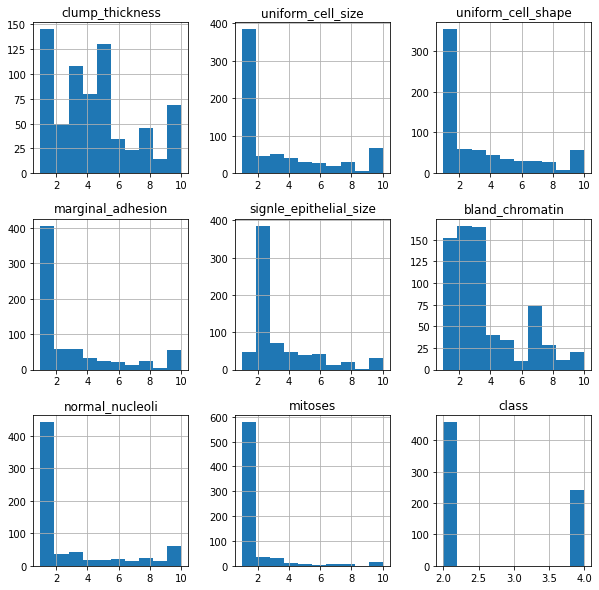

In [5]:
# plot histograms for each variable 
df.hist(figsize = (10, 10))
plt.show()

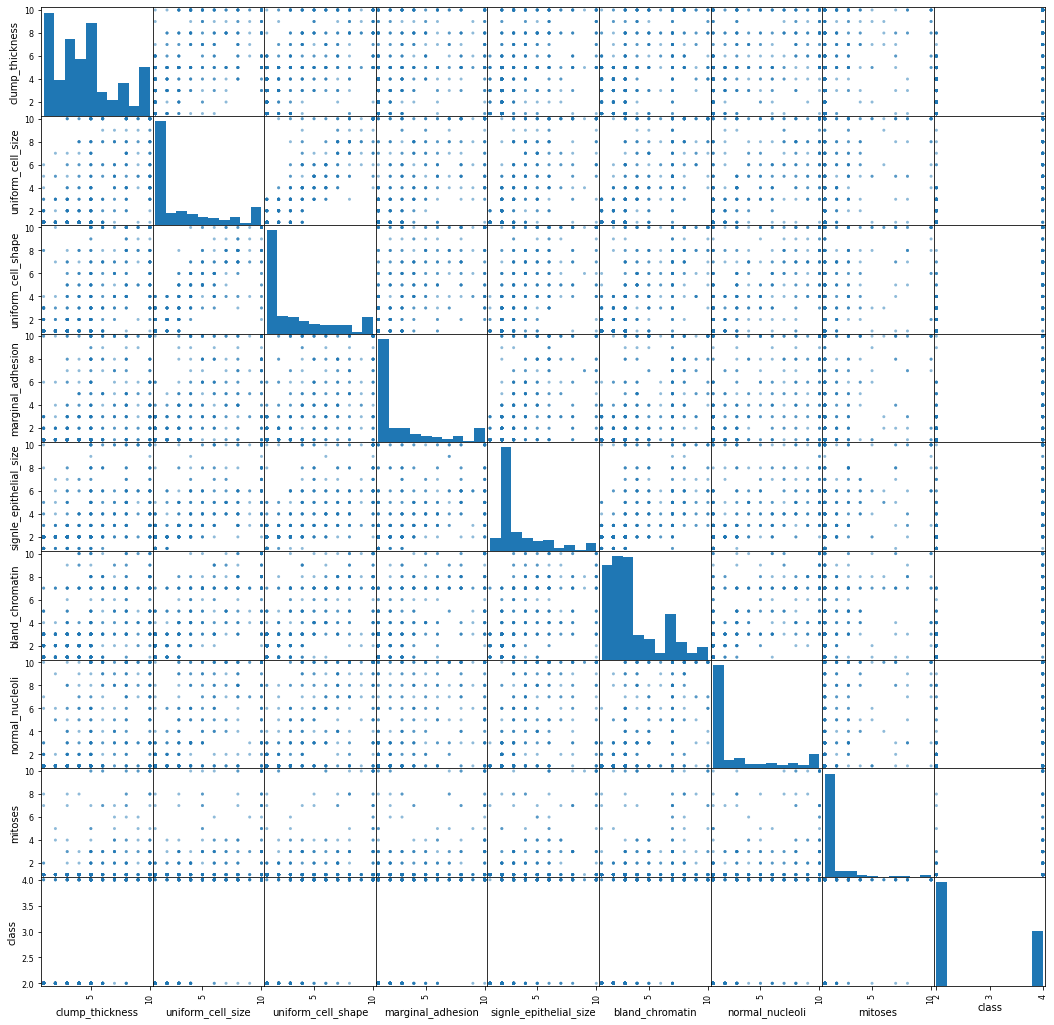

In [6]:
# create scatter plot matrix
scatter_matrix(df, figsize = (18, 18))
plt.show()

In [7]:
# specify testing options 
seed = 8
scoring = 'accuracy'

In [9]:
from sklearn.model_selection import train_test_split


In [12]:
# Define the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))


In [14]:
#create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

C:\Users\Owner\AppData\Local\Temp/ipykernel_18728/3455026661.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['class'], 1))


In [17]:
#Make predictions on validation dataset

for name, model in models: 
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        91
           4       0.96      0.98      0.97        49

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [18]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([(4,2,1,1,1,2,3,2,4)])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.65
[2]
